## Import Dependency

In [47]:
import time
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping
from keras.models import Model
from keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import RMSprop

## Load Dataset

In [2]:
file =  '../Dataset/processed_student_depression_dataset.csv'

In [3]:
df = pd.read_csv(file)

In [4]:
df.head()

,Suicidal Thoughts_Yes,Dietary Habits Encoded,Financial Stress,Work/Study Hours,Study Satisfaction,Academic Pressure,Age,Depression
0,True,0,1.0,3.0,2.0,5.0,33.0,1
1,False,1,2.0,3.0,5.0,2.0,24.0,0
2,False,0,1.0,9.0,5.0,3.0,31.0,0
3,True,1,5.0,4.0,2.0,3.0,28.0,1
4,True,1,1.0,1.0,3.0,4.0,25.0,0


## Prepare Data For Training Traditional Machine Learning Models

In [5]:
# Features and target
X = df[['Suicidal Thoughts_Yes', 'Dietary Habits Encoded', 'Financial Stress', 'Work/Study Hours', 'Study Satisfaction', 'Academic Pressure', 'Age']]  # Your input features
y = df['Depression']  # Target variable

# Split the data into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Prepare Data For Deep Learning Model

In [6]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Train Traditional Machine Learning Model 

## LogisticRegression

In [7]:
# Initialize Logistic Regression model
log_reg = LogisticRegression(random_state=42)

# --- Train the model and measure time ---
start_time = time.time()  # Start the timer
log_reg.fit(X_train, y_train)  # Train the model
training_time = time.time() - start_time  # Measure training time

# --- Make predictions on the test set ---
y_pred_test = log_reg.predict(X_test)

# Calculate classification performance metrics for the test set
accuracy_test = accuracy_score(y_test, y_pred_test)
precision_test = precision_score(y_test, y_pred_test)
recall_test = recall_score(y_test, y_pred_test)
f1_test = f1_score(y_test, y_pred_test)
roc_auc_test = roc_auc_score(y_test, log_reg.predict_proba(X_test)[:, 1])  # For ROC AUC, use predicted probabilities

# --- Evaluate on TRAIN set ---
y_pred_train = log_reg.predict(X_train)

# Calculate classification performance metrics for the train set
accuracy_train = accuracy_score(y_train, y_pred_train)
precision_train = precision_score(y_train, y_pred_train)
recall_train = recall_score(y_train, y_pred_train)
f1_train = f1_score(y_train, y_pred_train)
roc_auc_train = roc_auc_score(y_train, log_reg.predict_proba(X_train)[:, 1])

# --- Print results ---
print("\nLogistic Regression Performance:")
print(f"Training Time: {training_time:.2f} seconds\n")

print("Training Set Metrics:")
print(f"  Accuracy: {accuracy_train}")
print(f"  Precision: {precision_train}")
print(f"  Recall: {recall_train}")
print(f"  F1-Score: {f1_train}")
print(f"  ROC AUC: {roc_auc_train}")

print("\nTest Set Metrics:")
print(f"  Accuracy: {accuracy_test}")
print(f"  Precision: {precision_test}")
print(f"  Recall: {recall_test}")
print(f"  F1-Score: {f1_test}")
print(f"  ROC AUC: {roc_auc_test}")


Logistic Regression Performance:
Training Time: 0.04 seconds

Training Set Metrics:
  Accuracy: 0.8468189964157706
  Precision: 0.8560812302258848
  Recall: 0.8883035577950832
  F1-Score: 0.8718947881149537
  ROC AUC: 0.9211429941128451

Test Set Metrics:
  Accuracy: 0.8407095502598101
  Precision: 0.8540850165812481
  Recall: 0.874922791846819
  F1-Score: 0.8643783371472159
  ROC AUC: 0.912754918716258


## Feed-Forward Neural Network

In [119]:
# Define the input layer (shape based on number of features)
input_layer = Input(shape=(X_train.shape[1],))

# Hidden layers
x = Dense(128, activation='relu')(input_layer)
x = Dense(64, activation='relu')(x)
x = Dense(32, activation='relu')(x)

# Output layer (1 unit for binary classification)
output_layer = Dense(1, activation='sigmoid')(x)

# Build the model
model = Model(inputs=input_layer, outputs=output_layer)

optimizer = Adam(learning_rate=0.00001)
#optimizer = RMSprop(learning_rate=0.00001)

# Compile the model
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

In [120]:
# Set up EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Record the start time for training
start_time = time.time()

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=500, batch_size=64, validation_data=(X_test_scaled, y_test), verbose=1, callbacks=[early_stopping])

# Record the end time for training
end_time = time.time()
# Calculate the training time
training_time = end_time - start_time

Epoch 1/500
349/349 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6429 - loss: 0.6486 - val_accuracy: 0.7488 - val_loss: 0.6080
Epoch 2/500
349/349 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8131 - loss: 0.5695 - val_accuracy: 0.8183 - val_loss: 0.5411
Epoch 3/500
349/349 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8333 - loss: 0.5064 - val_accuracy: 0.8214 - val_loss: 0.4877
Epoch 4/500
349/349 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8362 - loss: 0.4569 - val_accuracy: 0.8246 - val_loss: 0.4471
Epoch 5/500
349/349 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8384 - loss: 0.4201 - val_accuracy: 0.8300 - val_loss: 0.4182
Epoch 6/500
349/349 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8414 - loss: 0.3947 - val_accuracy: 0.8318 - val_loss: 0.3995
Epoch 7/500
349/349 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8432 - loss: 0.3783 - val_accuracy: 0.8328 - val_loss: 0.3881
Epoch 8/500
349/349 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8446 - loss: 0.3682 - val_accu

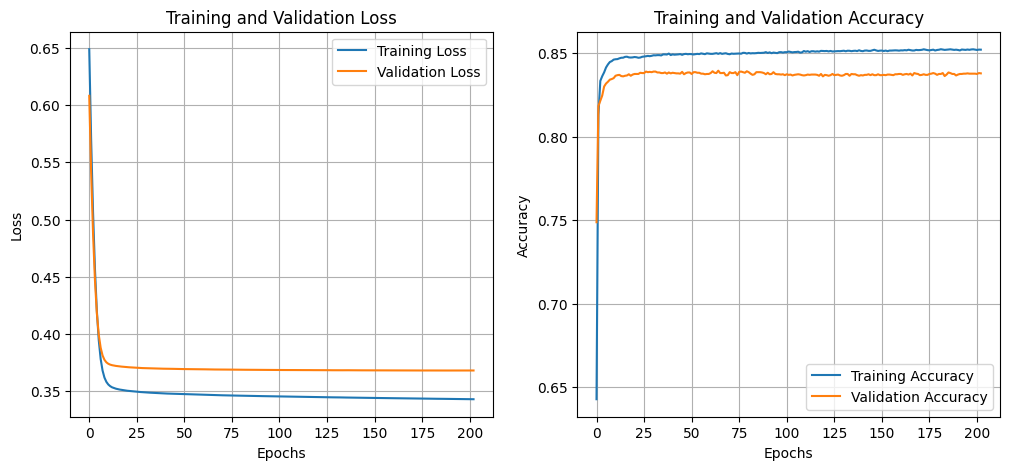

In [121]:
# Plot Loss
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.show()

In [122]:
# Make predictions
y_pred_train_nn = (model.predict(X_train_scaled) > 0.5).astype("int32")  # Assuming binary classification, adjust as needed
y_pred_nn = (model.predict(X_test_scaled) > 0.5).astype("int32")

# Accuracy
accuracy_train_nn = accuracy_score(y_train, y_pred_train_nn)
accuracy_nn = accuracy_score(y_test, y_pred_nn)

# Precision
precision_train_nn = precision_score(y_train, y_pred_train_nn)
precision_nn = precision_score(y_test, y_pred_nn)

# Recall
recall_train_nn = recall_score(y_train, y_pred_train_nn)
recall_nn = recall_score(y_test, y_pred_nn)

# F1-Score
f1_train_nn = f1_score(y_train, y_pred_train_nn)
f1_nn = f1_score(y_test, y_pred_nn)

# ROC AUC Score
roc_auc_train_nn = roc_auc_score(y_train, y_pred_train_nn)
roc_auc_nn = roc_auc_score(y_test, y_pred_nn)

# Print results
print("\nLogistic Regression Performance:")
print(f"Training Time: {training_time:.2f} seconds\n")

print("Training Set Metrics:")
print(f"  Accuracy: {accuracy_train_nn}")
print(f"  Precision: {precision_train_nn}")
print(f"  Recall: {recall_train_nn}")
print(f"  F1-Score: {f1_train_nn}")
print(f"  ROC AUC: {roc_auc_train_nn}")

print("\nTest Set Metrics:")
print(f"  Accuracy: {accuracy_nn}")
print(f"  Precision: {precision_nn}")
print(f"  Recall: {recall_nn}")
print(f"  F1-Score: {f1_nn}")
print(f"  ROC AUC: {roc_auc_nn}")

# Optional: Detailed classification report
print("\nClassification Report (Test Set):")
print(classification_report(y_test, y_pred_nn))

698/698 ━━━━━━━━━━━━━━━━━━━━ 0s 522us/step
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 527us/step

Logistic Regression Performance:
Training Time: 89.60 seconds

Training Set Metrics:
  Accuracy: 0.8519713261648746
  Precision: 0.8625259105715132
  Recall: 0.8895251183386776
  F1-Score: 0.8758174847778697
  ROC AUC: 0.8440794101777969

Test Set Metrics:
  Accuracy: 0.837484321806128
  Precision: 0.8517959553274977
  Recall: 0.871525633106856
  F1-Score: 0.8615478552892688
  ROC AUC: 0.830982620223936

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.82      0.79      0.80      2343
           1       0.85      0.87      0.86      3238

    accuracy                           0.84      5581
   macro avg       0.83      0.83      0.83      5581
weighted avg       0.84      0.84      0.84      5581

